In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
t2t =  pd.read_csv('vst_candidates_chm13t2t_cnvs.csv')
#t2t = pd.read_csv('../data/vst_')
grch37 = pd.read_csv('vst_candidates_grch37.csv')
#grch37 = pd.read_csv('../data/vst_results_grch37.csv')


In [3]:
t2t.columns[4:25]
#t2t['WestEurasia-Oceania']
grch37#['WestEurasia-Oceania']

,Chromosome,Start,End,Africa-America,Africa-CentralAsiaSiberia,Africa-EastAsia,Africa-Oceania,Africa-SouthAsia,Africa-WestEurasia,America-CentralAsiaSiberia,...,CentralAsiaSiberia-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-SouthAsia,CentralAsiaSiberia-WestEurasia,EastAsia-Oceania,EastAsia-SouthAsia,EastAsia-WestEurasia,Oceania-SouthAsia,Oceania-WestEurasia,SouthAsia-WestEurasia
0,chr1,8360201,8360201,0.32161,0.19993,0.00000,0.00000,0.00000,0.00000,0.00956,...,0.20261,0.15949,0.19242,0.22741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,chr1,9846201,9846201,0.27586,0.04239,0.04981,0.02736,0.09376,0.01048,0.12424,...,0.00196,0.01078,0.02217,0.00500,0.01737,0.01359,0.01488,0.04846,0.00036,0.05253
2,chr1,13219701,13219701,0.12209,0.03194,0.00035,0.01716,0.00461,0.03145,0.25941,...,0.03815,0.09418,0.06579,0.10193,0.01286,0.00234,0.02582,0.00593,0.00135,0.01395
3,chr1,16150401,16150401,0.00136,0.01265,0.02431,0.16701,0.07339,0.06031,0.02660,...,0.00097,0.28660,0.13966,0.10306,0.33966,0.18954,0.15444,0.02655,0.02565,0.00035
4,chr1,24377601,24377601,0.00769,0.11063,0.25742,0.66625,0.13524,0.15024,0.10092,...,0.06285,0.38182,0.00497,0.01891,0.14607,0.03831,0.01258,0.30917,0.20186,0.00683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,chr9,131183401,131183401,0.08988,0.07894,0.00025,0.00037,0.11241,0.33761,0.00243,...,0.07787,0.07081,0.00267,0.11757,0.00107,0.11122,0.32242,0.09506,0.30464,0.08488
454,chr9,134074401,134074401,0.24892,0.00807,0.00186,0.06963,0.01037,0.02543,0.17743,...,0.00206,0.03050,0.02831,0.05123,0.04679,0.01793,0.03793,0.09668,0.14224,0.00107
455,chr9,136453701,136453701,0.26558,0.21090,0.25679,0.01753,0.19511,0.06390,0.00612,...,0.00577,0.10340,0.00031,0.03493,0.13056,0.00897,0.07348,0.08675,0.01170,0.03321
456,chr9,137097701,137097701,0.00357,0.09135,0.09335,0.42325,0.21517,0.18116,0.05796,...,0.00000,0.20208,0.03162,0.01917,0.19304,0.03398,0.02388,0.08993,0.08715,0.00077


In [4]:
for i in t2t.columns[3:25]:
    print(i)
    print(stats.f_oneway(t2t[i], grch37[i]))
    

Africa-America
F_onewayResult(statistic=110.39695388643808, pvalue=1.8731614576108658e-25)
Africa-CentralAsiaSiberia
F_onewayResult(statistic=9.870138024990652, pvalue=0.00169352630745904)
Africa-EastAsia
F_onewayResult(statistic=214.8659324378361, pvalue=2.716569646823499e-47)
Africa-Oceania
F_onewayResult(statistic=62.69529091188202, pvalue=3.1914455707809347e-15)
Africa-SouthAsia
F_onewayResult(statistic=139.49050939148762, pvalue=1.3166740093647006e-31)
Africa-WestEurasia
F_onewayResult(statistic=161.97743823717954, pvalue=2.5283508174856167e-36)
America-CentralAsiaSiberia
F_onewayResult(statistic=85.45851020769547, pvalue=3.952913084267912e-20)
America-EastAsia
F_onewayResult(statistic=40.236840198485304, pvalue=2.530447226231176e-10)
America-Oceania
F_onewayResult(statistic=82.5486764675543, pvalue=1.6652906155331588e-19)
America-SouthAsia
F_onewayResult(statistic=24.714569209771454, pvalue=6.959498328421004e-07)
America-WestEurasia
F_onewayResult(statistic=79.22649818836722, pva

In [5]:
t2t_anova = pd.melt(t2t.iloc[:,3:30])
t2t_anova['assembly'] = 'T2T-CHM13'
grch37_anova = pd.melt(grch37.iloc[:,3:30])
grch37_anova['assembly'] = 'GRCh37'
input_two_anova = pd.concat([grch37_anova, t2t_anova])
input_two_anova.columns = ['Populations', 'Vstvalue', 'Assembly']
input_two_anova

,Populations,Vstvalue,Assembly
0,Africa-America,0.32161,GRCh37
1,Africa-America,0.27586,GRCh37
2,Africa-America,0.12209,GRCh37
3,Africa-America,0.00136,GRCh37
4,Africa-America,0.00769,GRCh37
...,...,...,...
65683,SouthAsia-WestEurasia,0.01177,T2T-CHM13
65684,SouthAsia-WestEurasia,0.00977,T2T-CHM13
65685,SouthAsia-WestEurasia,0.00091,T2T-CHM13
65686,SouthAsia-WestEurasia,0.01003,T2T-CHM13


In [6]:
#perform two-way ANOVA
model = ols('Vstvalue ~ C(Populations) + C(Assembly) + C(Populations):C(Assembly)', data=input_two_anova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Populations),60.823579,20.0,337.323004,0.000000e+00
C(Assembly),3.164500,1.0,351.001567,3.865638e-78
C(Populations):C(Assembly),11.643939,20.0,64.576411,3.965600e-259
Residual,678.552281,75264.0,NaN,NaN


In [7]:
#perform two-way ANOVA
model = ols('Vstvalue ~ C(Populations) + C(Assembly) + C(Populations):C(Assembly)', data=input_two_anova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Populations),60.823579,20.0,337.323004,0.000000e+00
C(Assembly),3.164500,1.0,351.001567,3.865638e-78
C(Populations):C(Assembly),11.643939,20.0,64.576411,3.965600e-259
Residual,678.552281,75264.0,NaN,NaN


In [8]:
# ttest for each pair population
for i in t2t.columns[3:24]:
    print(i)
    print(stats.ttest_ind(t2t[i], grch37[i]))


Africa-America
TtestResult(statistic=-10.506995473799257, pvalue=1.8731614576096634e-25, df=3584.0)
Africa-CentralAsiaSiberia
TtestResult(statistic=-3.141677581323496, pvalue=0.0016935263074584824, df=3584.0)
Africa-EastAsia
TtestResult(statistic=-14.65830591977928, pvalue=2.716569646821545e-47, df=3584.0)
Africa-Oceania
TtestResult(statistic=-7.918035798850748, pvalue=3.1914455707794792e-15, df=3584.0)
Africa-SouthAsia
TtestResult(statistic=-11.81061003468862, pvalue=1.316674009364059e-31, df=3584.0)
Africa-WestEurasia
TtestResult(statistic=-12.72703572074737, pvalue=2.5283508174843318e-36, df=3584.0)
America-CentralAsiaSiberia
TtestResult(statistic=9.244377221192108, pvalue=3.9529130842657744e-20, df=3584.0)
America-EastAsia
TtestResult(statistic=-6.3432515477856715, pvalue=2.530447226230129e-10, df=3584.0)
America-Oceania
TtestResult(statistic=-9.085630218512877, pvalue=1.6652906155322842e-19, df=3584.0)
America-SouthAsia
TtestResult(statistic=-4.971374981810511, pvalue=6.9594983284

In [9]:
# mannwhitney for each pair population
for i in t2t.columns[3:24]:
    print(i)
    print(stats.mannwhitneyu(t2t[i], grch37[i]))


Africa-America
MannwhitneyuResult(statistic=497637.5, pvalue=4.226611918378041e-26)
Africa-CentralAsiaSiberia
MannwhitneyuResult(statistic=692778.0, pvalue=0.25544296250310794)
Africa-EastAsia
MannwhitneyuResult(statistic=450693.5, pvalue=1.0340462403251428e-37)
Africa-Oceania
MannwhitneyuResult(statistic=534751.0, pvalue=1.7277954164192247e-18)
Africa-SouthAsia
MannwhitneyuResult(statistic=487377.0, pvalue=1.893169198536559e-28)
Africa-WestEurasia
MannwhitneyuResult(statistic=462717.5, pvalue=1.585797937685569e-34)
America-CentralAsiaSiberia
MannwhitneyuResult(statistic=929832.0, pvalue=5.818268395309134e-25)
America-EastAsia
MannwhitneyuResult(statistic=594405.0, pvalue=3.829534426601407e-09)
America-Oceania
MannwhitneyuResult(statistic=560619.0, pvalue=5.310669295130456e-14)
America-SouthAsia
MannwhitneyuResult(statistic=652428.5, pvalue=0.0020210658105342407)
America-WestEurasia
MannwhitneyuResult(statistic=583746.5, pvalue=1.493329122277392e-10)
CentralAsiaSiberia-EastAsia
Mannwhi

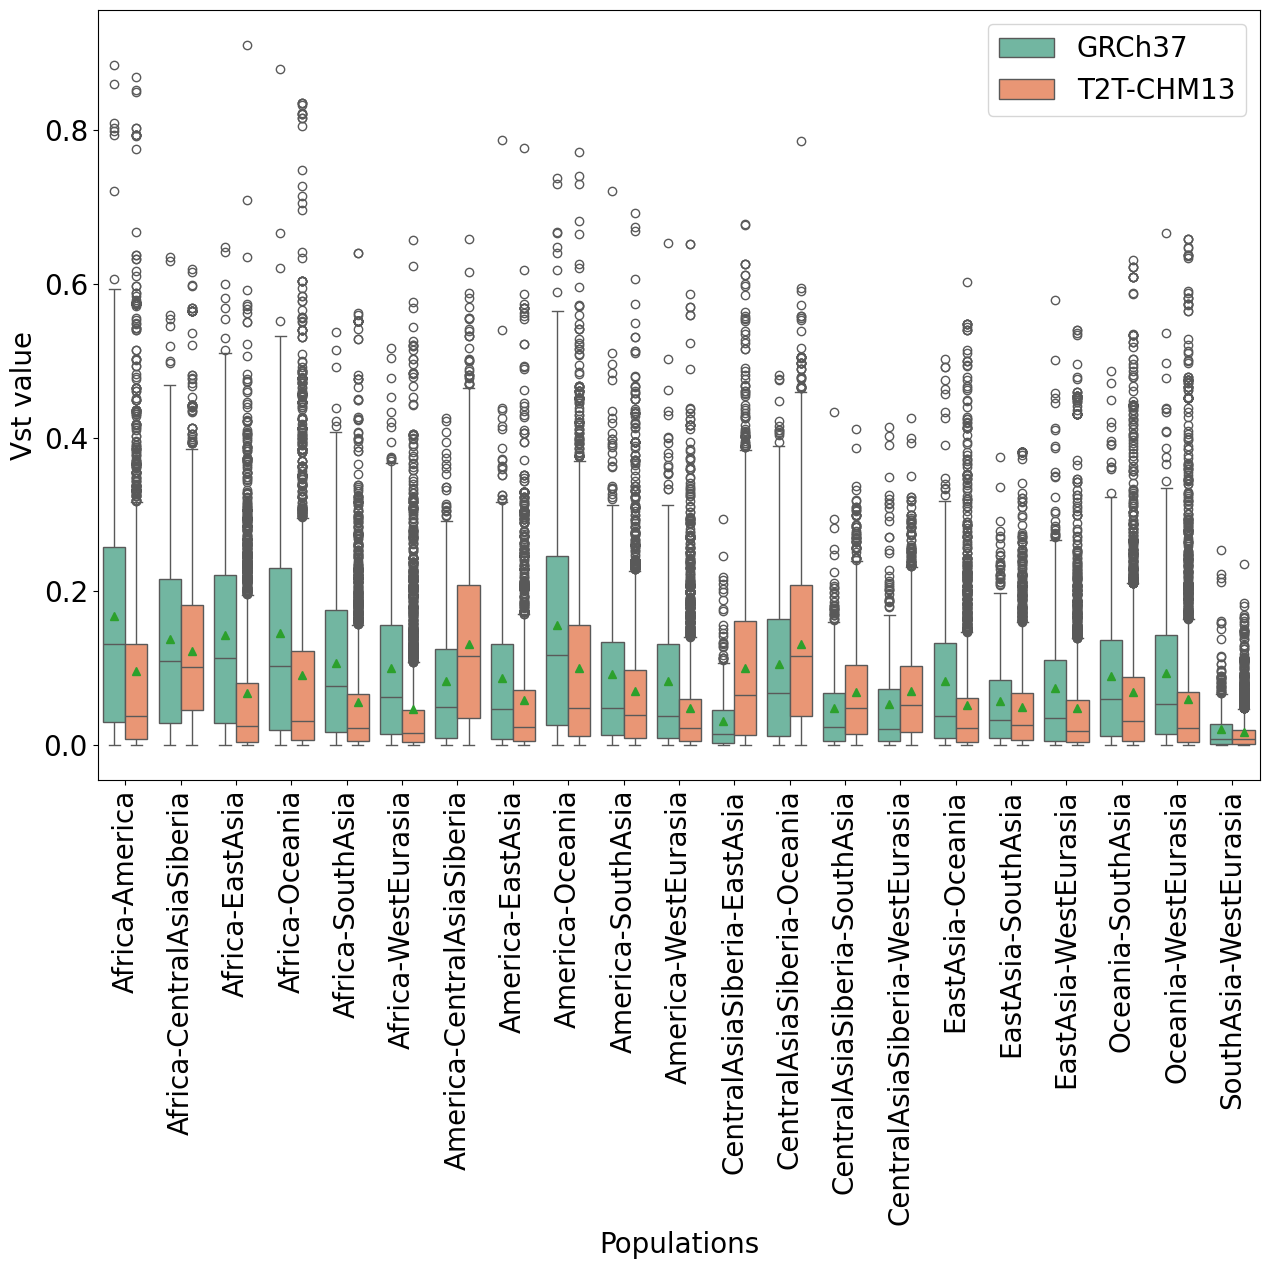

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Populations',y='Vstvalue',data=input_two_anova,hue='Assembly', palette= "Set2", showmeans=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Populations', fontsize=20)
plt.ylabel('Vst value', fontsize=20)
plt.legend(loc=1, prop={'size': 20})
plt.savefig('../plots/distribution_vst_among_assemblies.png', transparent=True, dpi=300, bbox_inches = "tight")
#sns.boxplot(input_boxplot, rot=90)
